# Python Homework 2

**Release date:** Friday January 29<br>
**Due date:** Friday, __Frebruary 12 (!)__, at midnight via <font color="blue">Gradescope</font> 

**Instruction:** Please upload your jupyter notebook on <font color="blue">Gradescope</font> with filename __PythonHW2_YOURPERMNUMBER.ipynb__.


Load some packages:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Problem 1 (10 Points)

Consider the continuous-time __Registration Line Markov Chain__ from Example 2.13 (Lecture 7).

1. Implement a simulation of this Markov chain on the time interval $[0,60]$. 

In [72]:
# from email this has a state space (0,1,2,3,4,5)
# arrival rates of 1/4 and service rate of 1/5

t_end = 60       # time interval [0, 60]
S = []        # states
T = [0]          # time of jump

Q = np.array([
    [-0.25,0.25,0,0,0],
    [0.2,-0.45,0.25,0,0],
    [0,0.2,-0.45,0.25,0],
    [0,0,0.2,-0.45,0.25],
    [0,0,0,0.2,-0.2]
])

p = np.array([
    [0,1,0,0,0],
    [4/9,0,5/9,0,0],
    [0,4/9,0,5/9,0],
    [0,0,4/9,0,5/9],
    [0,0,0,1,0]
])

def get_next_state(s_i, Q):
    T_ij = [np.random.exponential(1/q_ij) # waiting times
            if q_ij > 0 else np.inf
            for q_ij in Q[s_i]]           # iterate Q_ij 
    t_ij = min(T_ij)                      # shortest waiting time
    s_j = np.argmin(T_ij)                 # corresponding state
    return (s_j, t_ij)          

s_i = 1                                   # initialize first state
t = 0                                     # current time
while t < t_end:                          # iterating until end time
    s_j, t_ij = get_next_state(s_i, Q)    # move to next state
    s_i = s_j                             # update the current state to the new state
    t = t + t_ij                          # update the current time
    S.append(s_i)                         # record each new state
    T.append(t)                           # record the time when jumps happen
    
n = 2000
X = np.linspace(0, t_end, n)

# Matching the time line and states
Y = [S[i]                     
     for i in range(len(T)-1) 
     for x in X               
     if T[i] <= x < T[i+1]    
]


2. Plot a trajectory of this Markov Chain on $[0,60]$ by using your code from 1.

<i>Hint:</i> You can use the <tt>plt.hlines()</tt> command to plot horizontal lines (check also the documentation online).

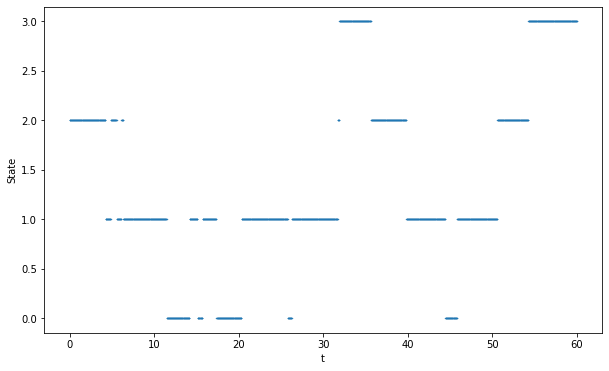

In [73]:
plt.figure(figsize=(10,6))
plt.plot(X, Y, marker='.', markersize=1, linestyle='')
plt.xlabel('t')
plt.ylabel('State');

3. Compute the transition function $P(t)$ at $t = \pi$.

*Hint:* Use a suitable function from the <tt>scipy.linalg</tt> package (check also the documentation online).

In [12]:
from scipy.linalg import expm

def transition_F(t):
    return expm(t*Q)

transition_F(math.pi)

array([[0.55524989, 0.308565  , 0.10512926, 0.02554735, 0.00550851],
       [0.246852  , 0.3925013 , 0.24489947, 0.08909819, 0.02664905],
       [0.06728272, 0.19591958, 0.37967644, 0.24578083, 0.11134043],
       [0.01308024, 0.05702284, 0.19662467, 0.39747023, 0.33580202],
       [0.00225628, 0.01364431, 0.07125787, 0.26864162, 0.64419991]])

4. Compute the stationary distribution of this continuous-time Markov chain.

*Hint:* Use suitable functions from the <tt>numpy.linalg package</tt> (check also the documentation online).

In [65]:
q_transpose = np.transpose(Q)

#use transpose of p to find eigen values and vectors
eigenvalues, eigenvectors = np.linalg.eig(q_transpose)
# find index of eigenvalue = 1
idx = np.argmin(np.abs(eigenvalues - 1))
w = np.real(eigenvectors[:, idx]).T
# normalize eigenvector 
print(w/np.sum(w))

[0.12184674 0.15230842 0.19038553 0.23798191 0.29747739]


## Problem 2 (10 Points)

Multistate Markov models are used in medicine to model the course of diseases. A patient may advance into, or recover from, successively more severe stages of a disease until some terminal state. Each stage represents a state of an absorbing continuous-time Markov chain. 

Bartolomeo et al. (2011) develop such a model to study the progression of liver disease among patients diagnosed with cirrhosis of the liver. The general form of the infinitesimal generator matrix $Q$ for their three-parameter model is

$$ Q = \begin{pmatrix} -(q_{12} + q_{13}) & q_{12} & q_{13} \\ 0 & -q_{23} & q_{23} \\ 0 & 0 & 0 \end{pmatrix}  $$

where state 1 represents cirrhosis, state 2 denotes liver cancer, and state 3 is death.

1. Starting from the first stage ("cirrhosis"), estimate the mean time to death (i.e. ending up in stage 3) by running 100,000 simulations. Use the transition rates

$$ q_{12} = 0.0151, \quad q_{13} = 0.0071, \quad q_{23} = 0.0284.$$

In [29]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!
trials = 100000
simlist = []
inital = 1

for i in range(trials):
    state = inital
    t = 0
    
    while True:
        if state == 1:
            q12 = np.random.exponential(1/0.0151,1) #N for npr.exponential is inverse of rate, size
            q13 = np.random.exponential(1/0.0071,1)
        
            if q12 < q13:
                t = t+q12
                state = 2
            else:
                t = t+q13
                break
        
        if state == 2:
            q23 = np.random.exponential(1/0.0284,1)
            t = t+q23
            break
        
    simlist.append(t)

np.mean(simlist)



69.15973753623051

2. Compare your approximation from 1. with the exact theoretical mean time to death (implement a suitable formula from class).  

In [26]:
q_12 = 0.0151
q_13 = 0.0071
q_23 = 0.0284

#using a1 formula to find mean time of death
a1 = (1/(q_12+q_13))+(q_12/(q_23*(q_12+q_13)))
print(a1)

68.99505138941758
